## Loading intracellular data

This notebook will walk you through how to read Meliza lab intracellular recordings. The data are stored in Axon Instruments' proprietary ABF files, but there is a good Python module [neo](https://neuralensemble.org/neo/) that will let you read them in easily.

Initial setup: The cell below will install neo and its dependencies into your user python site-packages. You may prefer to install neo in a virtual environment. You only need to do run this cell once, but it's okay to run it multiple times. 

In [1]:
!pip install --user neo

#### Notebook setup

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from neo import AxonIO
import quantities as pq
import numpy as np

# there is a constant junction potential offset that needs to be applied to the voltage
junction_potential = pq.Quantity(11.6, 'mV')  # measured at 32 C

#### Basic terminology

The data for each cell are stored in multiple files. Each file is called an **epoch** and contains data from one experimental protocol. An epoch consists of multiple **sweeps**, or trials. The current stimulus may vary from sweep to sweep.

Let's load some data from `920061fe`:

In [3]:
# open the file
fp = AxonIO(filename="data/920061fe/2014_12_11_0010.abf")
# read the data. There is only one block in each file
block = fp.read_block()

In [4]:
# Neo calls sweeps "segments"
sweep = block.segments[2]
# each sweep has one or more channels. Channel 0 is always V and channel 1 is always I.
V = sweep.analogsignals[0] - junction_potential
I = sweep.analogsignals[1]

In [5]:
# Each channel has some metadata including the sampling rate, units, duration, etc
# Note that the time variable represents the time since the start of the epoch
V
I

AnalogSignal with 1 channels of length 200000; units pA; datatype float32 
name: 'Channels: (I2_sec)'
annotations: {'stream_id': '0'}
sampling rate: 40000.0 Hz
time: 10.400000309944152 s to 15.400000309944152 s

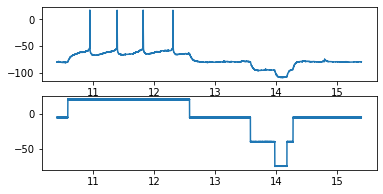

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 3))
axes[0].plot(V.times, V.magnitude)
axes[1].plot(I.times, I.magnitude)

### Complex currents

Check the `data/epochs.tbl` file for a complete list of epochs and the experimental protocol. The rows marked `complex` are the epochs where the cell was stimulated with currents derived from the Lorenz waveform. Unlike in the Margoliash lab data, the average frequency of the stimulus increases gradually over the course of the stimulus, and there are no hyperpolarizing/depolarizing steps. Those data can be found in the experiments marked `depolarize-steps` and `hyperpolarize-steps`.

#### Tonic cell

Tonic-firing neurons exhibit regular, sustained firing. They have low expression of Kv1.1, a low-threshold potassium current. Very strong currents may result in depolarization block (buildup of inactivation of sodium channels).


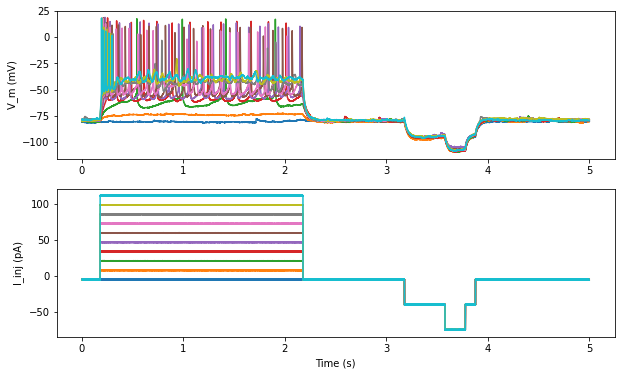

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fp = AxonIO(filename="data/920061fe/2014_12_11_0010.abf")
block = fp.read_block()
for segment in block.segments:
    V = segment.analogsignals[0] - junction_potential
    I = segment.analogsignals[1]
    t = V.times - V.t_start
    axes[0].plot(t, V.magnitude)
    axes[1].plot(t, I.magnitude)
axes[1].set_xlabel(f"Time ({t.dimensionality})")
axes[0].set_ylabel(f"V_m ({V.dimensionality})")
axes[1].set_ylabel(f"I_inj ({I.dimensionality})");

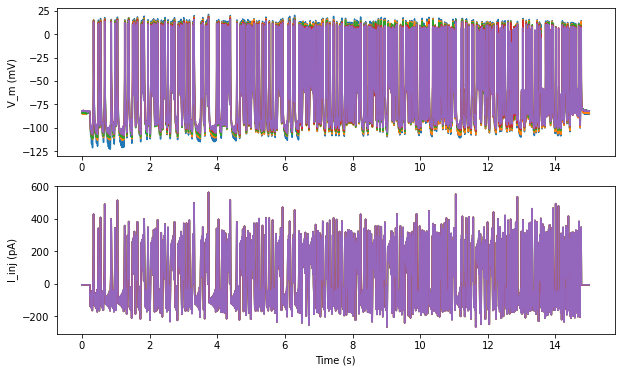

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fp = AxonIO(filename="data/920061fe/2014_12_11_0017.abf")
block = fp.read_block()
for segment in block.segments:
    V = segment.analogsignals[0] - junction_potential
    I = segment.analogsignals[1]
    t = V.times - V.t_start
    axes[0].plot(t, V.magnitude)
    axes[1].plot(t, I.magnitude)
axes[1].set_xlabel(f"Time ({t.dimensionality})")
axes[0].set_ylabel(f"V_m ({V.dimensionality})")
axes[1].set_ylabel(f"I_inj ({I.dimensionality})");

In [35]:
# Save segment 0 of block.segments
V = (block.segments[0]).analogsignals[0] - junction_potential
I = (block.segments[0]).analogsignals[1]
t = V.times - V.t_start
print(V.magnitude.shape)
print(V)
print(I.magnitude.shape)
print(t.shape)
V_and_I_arr = np.concatenate((V.magnitude, I.magnitude),axis=1)
print(V_and_I_arr.shape)
t_arr = np.array([t]).transpose()
np.savetxt("Meliza_2014_VIt.txt", np.concatenate((V_and_I_arr, t_arr),axis=1))

(600000, 1)
[[-83.49331 ]
 [-83.468895]
 [-83.4811  ]
 ...
 [-84.8605  ]
 [-84.8605  ]
 [-84.8666  ]] mV
(600000, 1)
(600000,)
(600000, 2)


#### Phasic neuron

Phasic cells only spike at the beginning of the current injection. This is a consequence of higher levels of expression of Kv1.1, which generates shunting inhibition after the first spike(s).

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fp = AxonIO(filename="data/32425a75/2014_09_10_0011.abf")
block = fp.read_block()
for segment in block.segments:
    V = segment.analogsignals[0] - junction_potential
    I = segment.analogsignals[1]
    t = V.times - V.t_start
    axes[0].plot(t, V.magnitude)
    axes[1].plot(t, I.magnitude)
axes[1].set_xlabel(f"Time ({t.dimensionality})")
axes[0].set_ylabel(f"V_m ({V.dimensionality})")
axes[1].set_ylabel(f"I_inj ({I.dimensionality})");

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fp = AxonIO(filename="data/32425a75/2014_09_10_0013.abf")
block = fp.read_block()
for segment in block.segments:
    V = segment.analogsignals[0] - junction_potential
    I = segment.analogsignals[1]
    t = V.times - V.t_start
    axes[0].plot(t, V.magnitude)
    axes[1].plot(t, I.magnitude)
axes[1].set_xlabel(f"Time ({t.dimensionality})")
axes[0].set_ylabel(f"V_m ({V.dimensionality})")
axes[1].set_ylabel(f"I_inj ({I.dimensionality})");